Alejandro Tomas Mackey
A01164338
Ciencia y analítica de datos

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [129]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [130]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [131]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

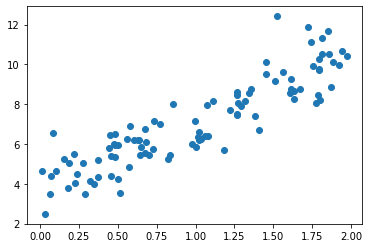

In [132]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [133]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [134]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [135]:
#X_fit[]

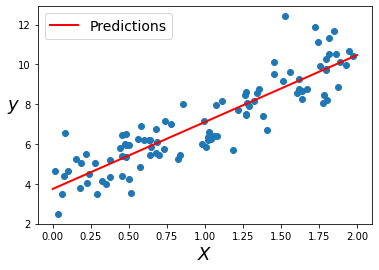

In [136]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [137]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [138]:
X_new.shape

(2, 1)

In [139]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [140]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [141]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [142]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

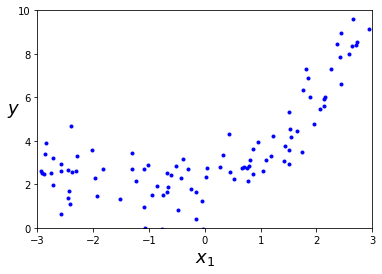

In [143]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [144]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [145]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [146]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [147]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [148]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [149]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

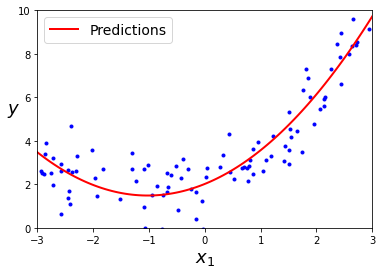

In [150]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso


In [152]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')


In [153]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

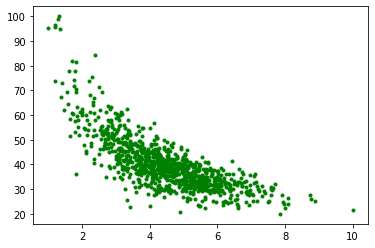

In [154]:
plt.plot(X,y,'g.')


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

Ecuacion: y = -6.099779391013593 * X  + 67.37849490667226
R2 = 0.4731766343360183
MSE = 53.75365860956318
MAE = 5.325178891656717
MAPE = 0.14085182163627585


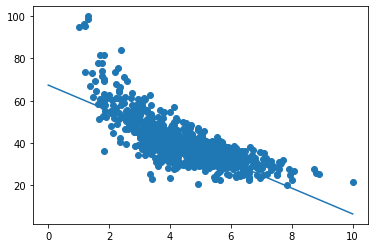

In [156]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train.values, y_train)
xfit = np.linspace(0, 10, 100)
yfit = lr.predict(xfit[:, np.newaxis])
plt.scatter(X_train, y_train)
plt.plot(xfit, yfit)
print(f"Ecuacion: y = {lr.coef_[0]} * X  + {lr.intercept_}")
y_pred = lr.predict(X_test.values)
lr_r2 = r2_score(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print(f"""R2 = {lr_r2}
MSE = {mean_squared_error(y_test, y_pred)}
MAE = {lr_mae}
MAPE = {mean_absolute_percentage_error(y_test, y_pred)}""")

Ecuacion: y = 1.180453960060484 * X^2 + -16.95951163576791 * X + 90.21797851636111
R2 = 0.5509478069029594
MSE = 5.162954150580805
MAE = 5.162954150580805
MAPE = 0.1350015934427502


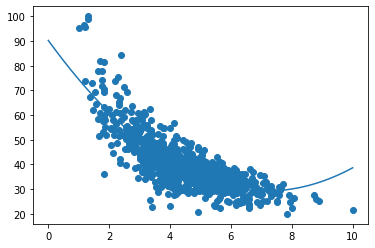

In [157]:

#Transformacion a polinomio grado 2
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_2.fit_transform(X_train)
#hacemos la regresion lineal con los features polinomiales
p2 = LinearRegression(fit_intercept=True)
p2.fit(X_poly_train, y_train)

# create line to plot
x_fit = np.linspace(0, 10, 100).reshape(-1, 1)
xfit_poly = poly_2.fit_transform(x_fit)
yfit = p2.predict(xfit_poly)

# plot train data
plt.scatter(X_train, y_train)
plt.plot(xfit, yfit)

# print eq params
print(f"Ecuacion: y = {p2.coef_[1]} * X^2 + {p2.coef_[0]} * X + {p2.intercept_}")

y_pred = p2.predict(poly_2.fit_transform(X_test))

p2_r2 = r2_score(y_test, y_pred)
p2_mae = mean_absolute_error(y_test, y_pred)

# print r^2 and errors
print(f"""R2 = {p2_r2}
MSE = {p2_mae}
MAE = {mean_absolute_error(y_test, y_pred)}
MAPE = {mean_absolute_percentage_error(y_test, y_pred)}""")

R2 = 0.5509478069029594
MSE = 5.162954150580805
MAE = 5.324422580274004
MAPE = 0.14082174453901947


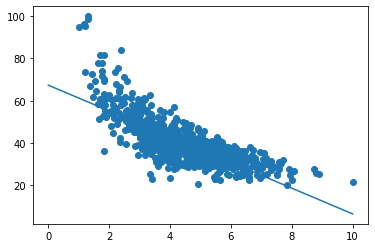

In [158]:
# hacemos el modelo de ridge
ridge = Ridge(fit_intercept=True)
ridge.fit(X_train.values, y_train)

x_fit = np.linspace(0, 10, 100).reshape(-1, 1)
yfit = ridge.predict(x_fit)
plt.scatter(X_train, y_train)
plt.plot(xfit, yfit)


y_pred = ridge.predict(X_test.values)

ridge_r2 = r2_score(y_test, y_pred)
ridge_mae = mean_absolute_error(y_test, y_pred)

# print r^2 and errors
print(f"""R2 = {p2_r2}
MSE = {p2_mae}
MAE = {mean_absolute_error(y_test, y_pred)}
MAPE = {mean_absolute_percentage_error(y_test, y_pred)}""")

R2 = 0.4809703350850747
MSE = 5.225506765983153
MAE = 5.225506765983153
MAPE = 0.1367483768384394


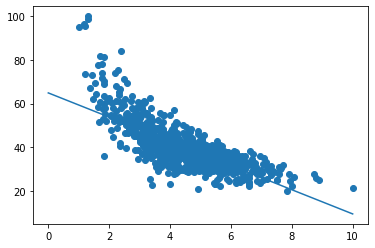

In [159]:


lasso = Lasso(fit_intercept=True)
lasso.fit(X_train.values, y_train)
x_fit = np.linspace(0, 10, 100).reshape(-1, 1)
yfit = lasso.predict(x_fit)

plt.scatter(X_train, y_train)
plt.plot(xfit, yfit)


y_pred = lasso.predict(X_test.values)

lasso_r2 = r2_score(y_test, y_pred)
lasso_mae = mean_absolute_error(y_test, y_pred)

print(f"""R2 = {lasso_r2}
MSE = {lasso_mae}
MAE = {mean_absolute_error(y_test, y_pred)}
MAPE = {mean_absolute_percentage_error(y_test, y_pred)}""")

R^2


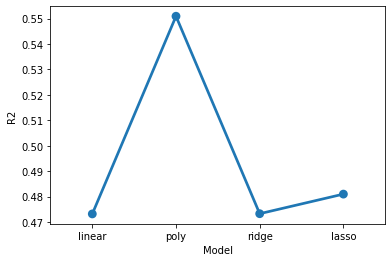

In [160]:
df_plot = pd.DataFrame([['linear', lr_r2, lr_mae],
                        ['poly', p2_r2, p2_mae],
                        ['ridge', ridge_r2, ridge_mae],
                        ['lasso', lasso_r2, lasso_mae]], columns=['Model', 'R2', 'MAE'])
print("R^2")
sns.pointplot(
    data=df_plot, x="Model", y="R2",
    capsize=.4, join=True
)

MAE


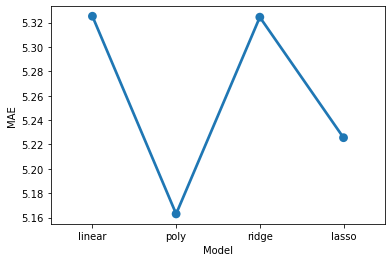

In [161]:
print("MAE")
sns.pointplot(
    data=df_plot, x="Model", y="MAE",
    capsize=.4, join=True
)

¿Qué método conviene más a la empresa?

Yo diría que el modelo polinomial es el que mejor se ajusta a la naturaleza de los datos

¿Por qué?

Al ser datos más complejos que una linea con ruido, el polinomio ofrece la flexibilidad para ajustar mejor, así dando un mejor r2 y también al estar más adecuado a los datos, da un menor error.

¿Qué porcentajes de entrenamiento y evaluación usaste?

90% training y 10% test

¿Qué error tienes?, ¿es bueno?, ¿cómo lo sabes?

El error que tengo en el modelo ´polinomial es de 14% (MAPE). Siempre dependerá del caso de uso, pero en términos generales menor a 20% es aceptable.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [162]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')


In [163]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


In [164]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)


In [166]:
lr = LinearRegression(fit_intercept=True)

lr.fit(X_train.values, y_train)

y_pred = lr.predict(X_test.values)

lr_r2 = r2_score(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)


print(f"""R2 = {lr_r2}
MSE = {mean_squared_error(y_test, y_pred)}
MAE = {lr_mae}
MAPE = {mean_absolute_percentage_error(y_test, y_pred)}""")


R2 = 0.6440074783425058
MSE = 57103093547.09139
MAE = 143826.44841926268
MAPE = 0.2861574102510932


In [167]:

poly_feat_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_feat_2.fit_transform(X_train)

p2 = LinearRegression(fit_intercept=True)

p2.fit(X_poly_train, y_train)

y_pred = p2.predict(poly_feat_2.fit_transform(X_test))

p2_r2 = r2_score(y_test, y_pred)
p2_mae = mean_absolute_error(y_test, y_pred)

print(f"""R2 = {p2_r2}
MSE = {p2_mae}
MAE = {mean_absolute_error(y_test, y_pred)}
MAPE = {mean_absolute_percentage_error(y_test, y_pred)}""")

R2 = 0.7652688284878235
MSE = 126288.63812754548
MAE = 126288.63812754548
MAPE = 0.25353031090341893


In [168]:
ridge = Ridge(fit_intercept=True)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

ridge_r2 = r2_score(y_test, y_pred)
ridge_mae = mean_absolute_error(y_test, y_pred)


print(f"""R2 = {ridge_r2}
MSE = {ridge_mae}
MAE = {mean_absolute_error(y_test, y_pred)}
MAPE = {mean_absolute_percentage_error(y_test, y_pred)}""")

R2 = 0.643876149937446
MSE = 143836.41731758817
MAE = 143836.41731758817
MAPE = 0.2861635776946193


In [169]:
lasso = Lasso(fit_intercept=True, max_iter=10000, tol=1)

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

lasso_r2 = r2_score(y_test, y_pred)
lasso_mae = mean_absolute_error(y_test, y_pred)


print(f"""R2 = {lasso_r2}
MSE = {lasso_mae}
MAE = {mean_absolute_error(y_test, y_pred)}
MAPE = {mean_absolute_percentage_error(y_test, y_pred)}""")

R2 = 0.5819908631697125
MSE = 163102.71081501545
MAE = 163102.71081501545
MAPE = 0.33518332180315247


R2


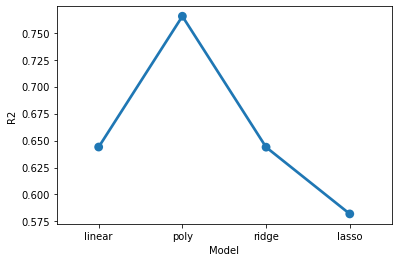

In [170]:
df_plot = pd.DataFrame([['linear', lr_r2, lr_mae],
                        ['poly', p2_r2, p2_mae],
                        ['ridge', ridge_r2, ridge_mae],
                        ['lasso', lasso_r2, lasso_mae]], columns=['Model', 'R2', 'MAE'])
print("R2")
sns.pointplot(
    data=df_plot, x="Model", y="R2",
    capsize=.4, join=True
)

MAE


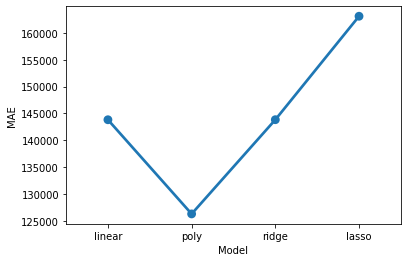

In [171]:
print("MAE")
sns.pointplot(
    data=df_plot, x="Model", y="MAE",
    capsize=.4, join=True
)

¿Qué método se aproxima mejor?

Nuevamente el modelo polinomial es la mejor aproximación

¿Por qué?

Porque logra disminuir más el error y el ajuste r2

¿Qué porcentajes de entrenamiento y evaluación usaste?

90% entrenamiento y 10% prueba

¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?

En este caso el error del modelo polinomial supera el estandar que mencionamos y es mayor al 20% por lo que lo considero un error demasiado alto